In [1]:
from binance.client import Client
from binance import ThreadedWebsocketManager
import pandas as pd
import numpy as np
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [15]:
real_api_key = 'jE86Ni9biRKFsIVsa6gUnIBdPsX6b9pEmpDx0sMEhEqQnYXX26JCtOIsbBdgY6mo'
real_api_secret = '7Rtc4vWaU0RcN9Zn4pXKaFjZahCWBrterQJs93V9hccO5t0Q60Jdn7FrhH2icynz'

In [45]:
client = Client(api_key = real_api_key, api_secret= real_api_secret, tld='com', testnet=False)

In [86]:
def get_history(symbol, interval, start="1 Jan, 2020", end ="1 Jan, 2022"):
    '''
    parameters: 
        - interval: valid intervals
               1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w
    '''
    symbol = str(symbol+'EUR')
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [87]:
symbols = ["ETH", "LTC", "BCH", "XRP", "EOS"]
#symbols = ["NANO"]

intervals_str = "5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h"
#intervals_str = "12h"

intervals = intervals_str.split(",")

In [88]:
intervals

['5m', ' 15m', ' 30m', ' 1h', ' 2h', ' 4h', ' 6h', ' 8h', ' 12h']

In [89]:
def get_df_path(symbol, interval):
    parent_dir = "hist_data"
    folder = str(symbol + "/" + interval.strip())
    file_name = str(symbol + "_" + interval.strip() +".csv")
    path = os.path.join(parent_dir, folder, file_name)
    return path

def load_histdata(symbols, intervals):
    for symbol in symbols: 
        for interval in intervals: 
            if symbol == "ETH" and interval == "5m":
                continue
            print(f"Getting data for {symbol} with {interval} interval.")
            # get path to store the loaded data as dataframe
            path = get_df_path(symbol, interval)
            #symbol = str(symbol+'EUR')
            print(symbol)
            df = get_history(symbol, interval.strip())

            if path is not None:
                df.to_csv(path)
            else: 
                print(f"ERROR: path{path}")

In [107]:
#load_histdata(symbols, intervals)

In [93]:
def save_figure(df, symbol, interval):
    title = str(symbol + " for " + interval)
            
    plot = df["Close"].plot(title=title, figsize=(12, 8))
    fig = plot.get_figure()
    pp.savefig(fig)
    plt.close(fig)

In [105]:
def print_hist_data():
    for symbol in symbols: 
        for interval in intervals: 
            path = get_df_path(symbol, interval)
            df = pd.read_csv(path)
            save_figure(df, symbol, interval)


In [106]:
pp = PdfPages('Plots.pdf')
print_hist_data()
pp.close()

In [29]:
df = pd.read_csv("./backtest_results.csv")

In [30]:
#df.reset_index(inplace=True)

In [31]:
df[df.Symbol == "EOS"].sort_values(by=["OutPerf"], ascending=False)

,Symbol,Strategy,Interval,FirstPrice,LastPrice,Initial Balance,Final Balance,\tBuyHold,Performance,OutPerf,Trades
9,EOS,EMA_and_SO,8h,4.866,2.712,1167.84,1909.24,-36.89,63.48,100.37,9
1,EOS,RSI,8h,4.866,2.712,1167.84,1832.64,-36.89,56.93,93.82,5
8,EOS,SMA_and_RSI,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
11,EOS,BB_and_SO,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
14,EOS,MACD_and_SO,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
13,EOS,MACD_and_RSI,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
12,EOS,BB_and_RSI,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
10,EOS,EMA_and_RSI,8h,4.866,2.712,1167.84,1710.24,-36.89,46.44,83.33,1
6,EOS,BB,8h,4.866,2.712,1167.84,1614.24,-36.89,38.22,75.11,37
15,EOS,ADX_and_EMA,8h,4.866,2.712,1167.84,1606.24,-36.89,37.54,74.43,21


In [32]:
df[df.Symbol == "XRP"].sort_values(by=["OutPerf"], ascending=False)

,Symbol,Strategy,Interval,FirstPrice,LastPrice,Initial Balance,Final Balance,\tBuyHold,Performance,OutPerf,Trades
71,XRP,EMA,8h,0.24198,0.7414,145.19,852.58,171.99,487.23,315.24,281
68,XRP,SMA,8h,0.24198,0.7414,145.19,763.12,171.99,425.61,253.62,305
73,XRP,ADX,8h,0.24198,0.7414,145.19,698.96,171.99,381.42,209.43,49
84,XRP,ADX_and_MACD,8h,0.24198,0.7414,145.19,698.96,171.99,381.42,209.43,49
69,XRP,RSI,8h,0.24198,0.7414,145.19,666.30,171.99,358.92,186.93,29
83,XRP,ADX_and_EMA,8h,0.24198,0.7414,145.19,623.90,171.99,329.72,157.73,29
72,XRP,MACD,8h,0.24198,0.7414,145.19,612.82,171.99,322.09,150.10,361
78,XRP,EMA_and_RSI,8h,0.24198,0.7414,145.19,591.74,171.99,307.57,135.58,9
74,XRP,BB,8h,0.24198,0.7414,145.19,586.24,171.99,303.78,131.79,129
76,XRP,SMA_and_RSI,8h,0.24198,0.7414,145.19,572.30,171.99,294.18,122.19,13


In [33]:
df[df.Symbol == "ETH"].sort_values(by=["OutPerf"], ascending=False)

,Symbol,Strategy,Interval,FirstPrice,LastPrice,Initial Balance,Final Balance,\tBuyHold,Performance,OutPerf,Trades
20,ETH,EMA,8h,515.24,3271.6,618.29,5128.07,445.81,729.40,283.59,333
21,ETH,MACD,8h,515.24,3271.6,618.29,5093.00,445.81,723.73,277.92,309
17,ETH,SMA,8h,515.24,3271.6,618.29,5050.35,445.81,716.83,271.02,353
22,ETH,ADX,8h,515.24,3271.6,618.29,4836.32,445.81,682.21,236.40,45
33,ETH,ADX_and_MACD,8h,515.24,3271.6,618.29,4836.32,445.81,682.21,236.40,45
32,ETH,ADX_and_EMA,8h,515.24,3271.6,618.29,4617.80,445.81,646.87,201.06,41
26,ETH,EMA_and_SO,8h,515.24,3271.6,618.29,4298.25,445.81,595.19,149.38,5
23,ETH,BB,8h,515.24,3271.6,618.29,4249.28,445.81,587.26,141.45,125
18,ETH,RSI,8h,515.24,3271.6,618.29,3889.89,445.81,529.14,83.33,1
27,ETH,EMA_and_RSI,8h,515.24,3271.6,618.29,3889.89,445.81,529.14,83.33,1


In [34]:
df[df.Symbol == "LTC"].sort_values(by=["OutPerf"], ascending=False)

,Symbol,Strategy,Interval,FirstPrice,LastPrice,Initial Balance,Final Balance,\tBuyHold,Performance,OutPerf,Trades
50,LTC,ADX_and_MACD,8h,124.26,130.3,1491.12,3410.90,4.05,128.75,124.70,13
49,LTC,ADX_and_EMA,8h,124.26,130.3,1491.12,3410.90,4.05,128.75,124.70,13
39,LTC,ADX,8h,124.26,130.3,1491.12,3410.90,4.05,128.75,124.70,13
40,LTC,BB,8h,124.26,130.3,1491.12,3054.16,4.05,104.82,100.77,49
37,LTC,EMA,8h,124.26,130.3,1491.12,2968.60,4.05,99.09,95.04,97
43,LTC,EMA_and_SO,8h,124.26,130.3,1491.12,2924.10,4.05,96.10,92.05,21
35,LTC,RSI,8h,124.26,130.3,1491.12,2843.71,4.05,90.71,86.66,9
45,LTC,BB_and_SO,8h,124.26,130.3,1491.12,2794.12,4.05,87.38,83.33,1
47,LTC,MACD_and_RSI,8h,124.26,130.3,1491.12,2794.12,4.05,87.38,83.33,1
46,LTC,BB_and_RSI,8h,124.26,130.3,1491.12,2794.12,4.05,87.38,83.33,1


In [178]:
df.groupby(by=["Symbol", "Interval", "Performance"]).max().sort_values(by=["Symbol","Performance"], ascending=False)

Strategy  Initial Balance  Final Balance  \
Symbol Interval Performance                                            
XRP    12h       1962.58          BB             0.07           1.35   
       8h        1848.91         EMA             0.07           1.41   
                 1602.43         SMA             0.07           1.24   
                 1425.66         ADX             0.07           1.11   
       12h       1351.66        MACD             0.07           0.95   
       8h        1335.68         RSI             0.07           1.04   
       12h       1237.06         RSI             0.07           0.88   
       8h        1188.36        MACD             0.07           0.94   
                 1115.13          BB             0.07           0.88   
                 951.04           SO             0.07           0.76   
       12h       842.71          ADX             0.07           0.62   
                 233.82          EMA             0.07           0.22   
                 167.53           SO             0.07           0.18   
                -394.41          SMA             0.07          -0.19   
LTC    12h       462.17           BB            35.97         202.23   
       8h        415.00          ADX            37.28         191.98   
       12h       339.16         MACD            35.97         157.98   
       8h        319.31           BB            37.28         156.31   
       12h       315.87          ADX            35.97         149.60   
       8h        296.37          EMA            37.28         147.76   
                 262.84          RSI            37.28         135.26   
       12h       261.38          RSI            35.97         130.00   
       8h        212.68         MACD            37.28         116.56   
                 172.55          SMA            37.28         101.60   
       12h       117.39           SO            35.97          78.20   
                 88.78           EMA            35.97          67.91   
                 45.94           SMA            35.97          52.50   
       8h       -82.99            SO            37.28           6.34   
ETH    8h        2820.92         EMA           154.57        4514.93   
                 2798.19        MACD           154.57        4479.79   
                 2770.89         SMA           154.57        4437.59   
                 2629.31         ADX           154.57        4218.75   
                 2250.50          BB           154.57        3633.21   
                 2016.55         RSI           154.57        3271.60   
       12h       1148.22         EMA           329.86        4117.45   
                 1017.27         ADX           329.86        3685.49   
                 1010.73          BB           329.86        3663.90   
                 985.66         MACD           329.86        3581.21   
                 887.33          RSI           329.86        3256.86   
                 865.33           SO           329.86        3184.29   
       8h        51.31            SO           154.57         233.89   
       12h      -59.97           SMA           329.86         132.05   
EOS    8h        127.70          RSI             1.46           3.32   
       12h       110.98          RSI             1.40           2.96   
                 78.82            SO             1.40           2.51   
                 69.98            BB             1.40           2.38   
                 67.34           ADX             1.40           2.35   
       8h        52.90            BB             1.46           2.23   
                 50.16           ADX             1.46           2.19   
       12h       48.73           SMA             1.40           2.09   
       8h       -43.01          MACD             1.46           0.83   
                -49.31           EMA             1.46           0.74   
       12h      -52.16          MACD             1.40           0.67   
       8h       -65.41            SO             1.46           0.50

<AxesSubplot:xlabel='Strategy', ylabel='Performance'>

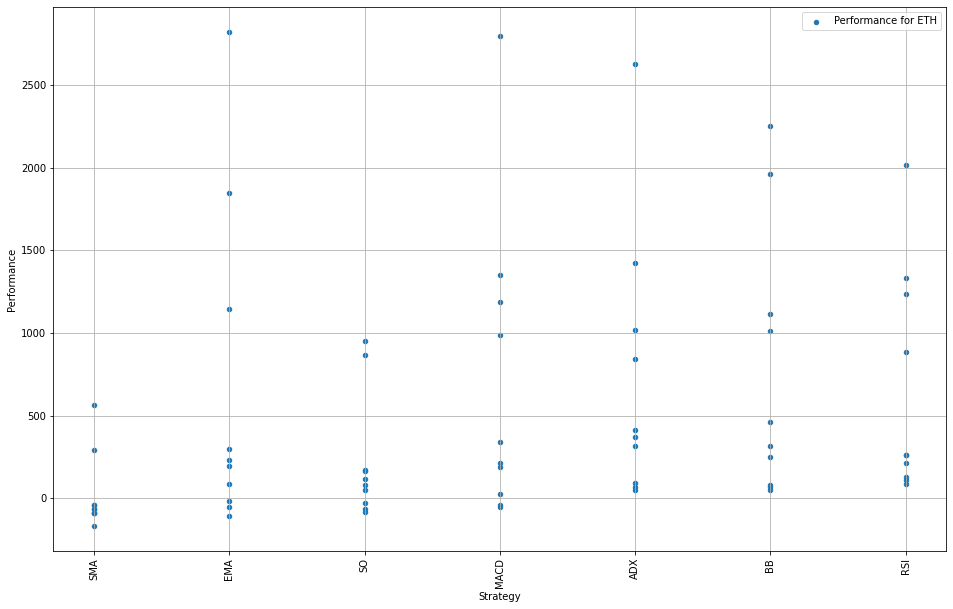

In [154]:
df.sort_values(by=["Performance"], ascending=True).plot.scatter(x="Strategy", y="Performance", label="Performance for ETH", rot=90, grid=True, figsize=(16,10))

In [129]:
df.groupby(by="Interval").max()

,Symbol,Strategy,Initial Balance,Final Balance,Performance,Trades
Interval,,,,,,
12h,LTC,SO,1429.42,4117.45,1148.22,253
15m,XRP,SO,1512.28,4654.38,4267.73,7223
1h,XRP,SO,1155.93,4799.88,4688.44,1737
2h,LTC,SO,781.17,5913.54,5014.03,881
30m,XRP,SO,1332.45,4793.25,4102.57,3739
4h,LTC,SO,637.57,5299.18,3501.65,547
6h,LTC,SO,619.32,5241.10,3567.16,417
8h,LTC,SO,669.81,4514.93,2820.92,353
5m,XRP,SO,1640.39,5550.90,5660.59,20537


In [161]:
sorted_df = df.sort_values(by=["Performance", "Interval"], ascending=False)

In [162]:
sorted_df

,Symbol,Strategy,Interval,Initial Balance,Final Balance,TradedValues,Performance,Trades
17,ETH,EMA,8h,154.57,4514.93,4514.93,2820.92,333
18,ETH,MACD,8h,154.57,4479.79,4479.79,2798.19,309
19,ETH,ADX,8h,154.57,4218.75,4218.75,2629.31,45
20,ETH,BB,8h,154.57,3633.21,3633.21,2250.50,125
15,ETH,RSI,8h,154.57,3271.60,3271.60,2016.55,1
69,XRP,BB,12h,0.07,1.35,1.35,1962.58,81
59,XRP,EMA,8h,0.07,1.41,1.41,1848.91,281
61,XRP,ADX,8h,0.07,1.11,1.11,1425.66,49
67,XRP,MACD,12h,0.07,0.95,0.95,1351.66,245
57,XRP,RSI,8h,0.07,1.04,1.04,1335.68,29


<ipython-input-163-60970e75ca6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[df["Symbol"] == "ETH"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for ETH", rot=90, grid=True, figsize=(16,10))


<AxesSubplot:xlabel='Interval', ylabel='Performance'>

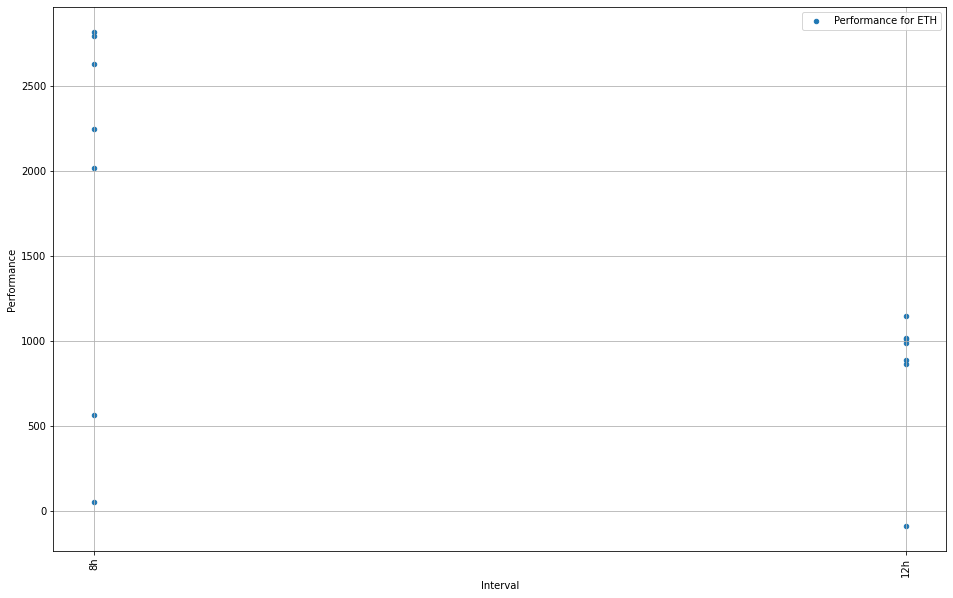

In [163]:
sorted_df[df["Symbol"] == "ETH"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for ETH", rot=90, grid=True, figsize=(16,10))

<ipython-input-164-f85c64d84a70>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[df["Symbol"] == "XRP"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for XRP", rot=90, grid=True, figsize=(16,10))


<AxesSubplot:xlabel='Interval', ylabel='Performance'>

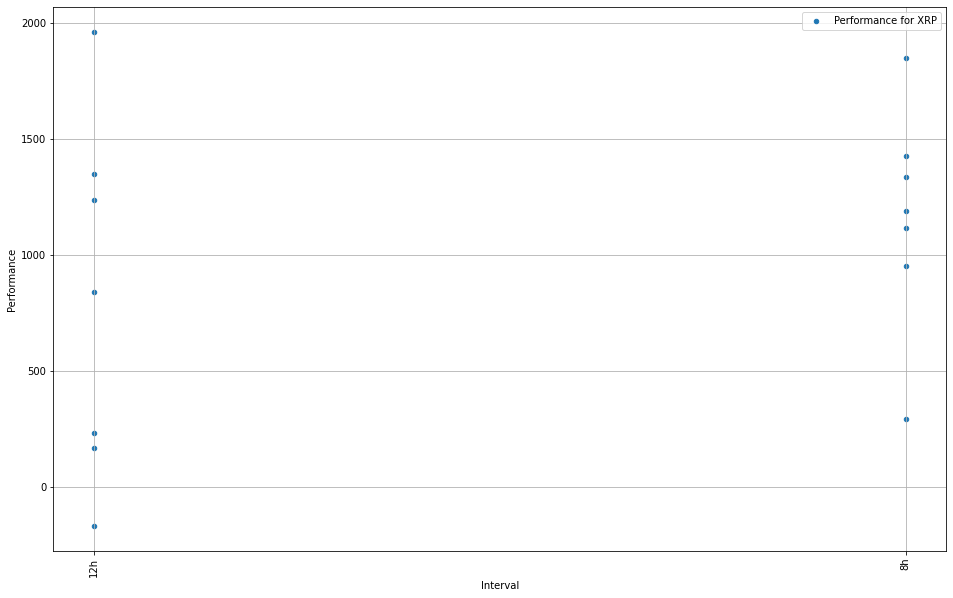

In [164]:
sorted_df[df["Symbol"] == "XRP"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for XRP", rot=90, grid=True, figsize=(16,10))

<ipython-input-165-2b797b80bd9a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[df["Symbol"] == "BCH"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for BTH", rot=90, grid=True, figsize=(16,10))


<AxesSubplot:xlabel='Interval', ylabel='Performance'>

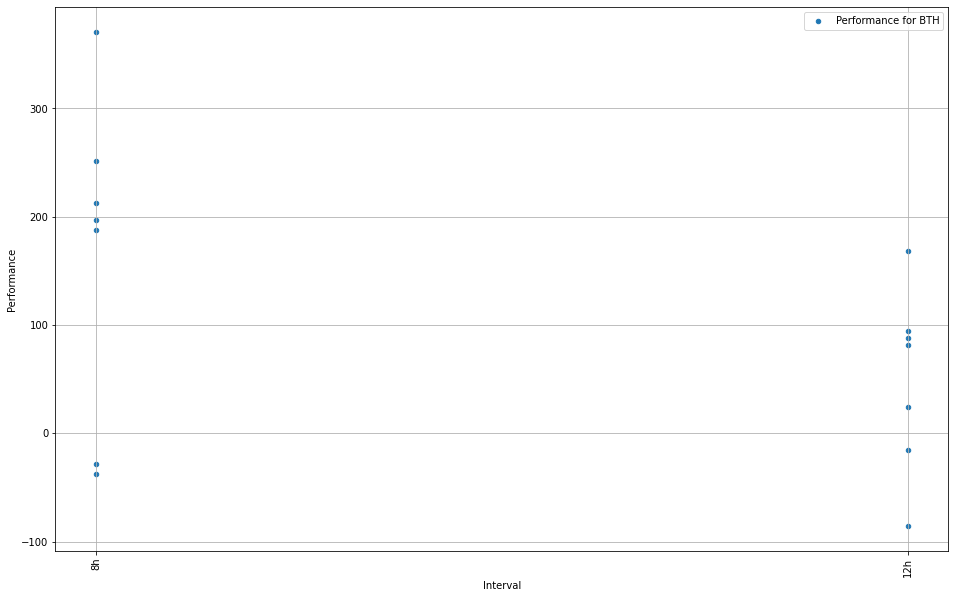

In [165]:
sorted_df[df["Symbol"] == "BCH"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for BTH", rot=90, grid=True, figsize=(16,10))

<ipython-input-166-c2947802c8af>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[df["Symbol"] == "LTC"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for LTC", rot=90, grid=True, figsize=(16,10))


<AxesSubplot:xlabel='Interval', ylabel='Performance'>

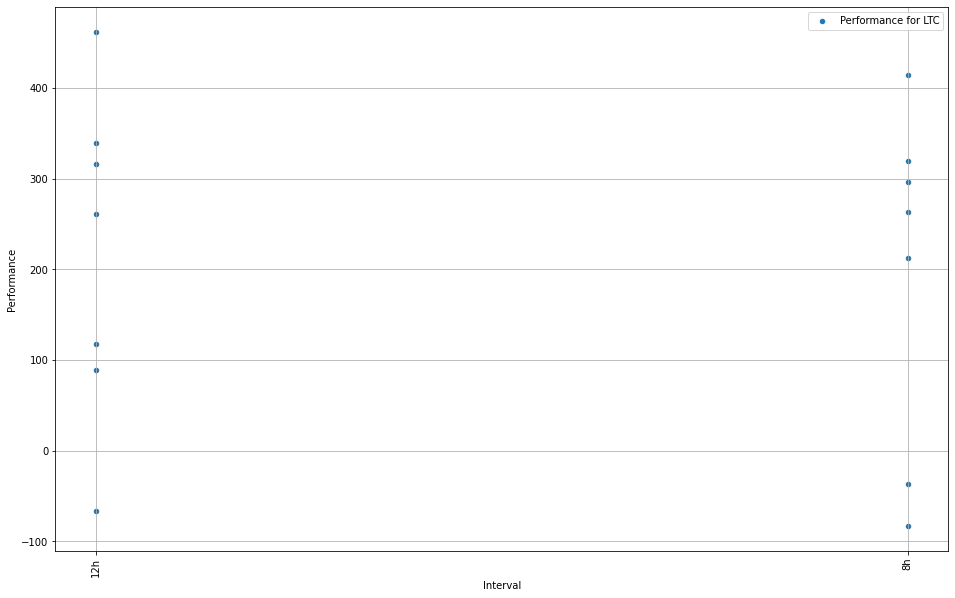

In [166]:
sorted_df[df["Symbol"] == "LTC"].sort_values(by=["Performance"], ascending=False).plot.scatter(x="Interval", y="Performance", label="Performance for LTC", rot=90, grid=True, figsize=(16,10))

In [168]:
sorted_df[(df["Symbol"] == "ETH") & (df["Strategy"]=="EMA")].sort_values(by=["Performance"], ascending=False)

<ipython-input-168-8dce8c4f5afb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[(df["Symbol"] == "ETH") & (df["Strategy"]=="EMA")].sort_values(by=["Performance"], ascending=False)


,Symbol,Strategy,Interval,Initial Balance,Final Balance,TradedValues,Performance,Trades
17,ETH,EMA,8h,154.57,4514.93,4514.93,2820.92,333
24,ETH,EMA,12h,329.86,4117.45,4117.45,1148.22,253


In [169]:
sorted_df[(df["Symbol"] == "ETH") & (df["Strategy"]=="BB")].sort_values(by=["Performance"], ascending=False)

<ipython-input-169-fec85ab5767b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[(df["Symbol"] == "ETH") & (df["Strategy"]=="BB")].sort_values(by=["Performance"], ascending=False)


,Symbol,Strategy,Interval,Initial Balance,Final Balance,TradedValues,Performance,Trades
20,ETH,BB,8h,154.57,3633.21,3633.21,2250.50,125
27,ETH,BB,12h,329.86,3663.90,3663.90,1010.73,77


In [150]:
sorted_df[(df["Symbol"] == "LTC")].sort_values(by=["Performance"], ascending=False)

<ipython-input-150-6866d70187b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[(df["Symbol"] == "LTC") ].sort_values(by=["Performance"], ascending=False)


,Symbol,Strategy,Interval,Initial Balance,Final Balance,Performance,Trades
125,LTC,BB,12h,35.97,202.23,462.17,41
65,LTC,SO,5m,56.64,294.64,420.23,3109
117,LTC,ADX,8h,37.28,191.98,415.00,13
101,LTC,EMA,4h,45.55,216.08,374.36,105
123,LTC,MACD,12h,35.97,157.98,339.16,77
110,LTC,ADX,6h,40.63,177.72,337.42,25
108,LTC,EMA,6h,40.63,172.67,324.99,93
118,LTC,BB,8h,37.28,156.31,319.31,49
124,LTC,ADX,12h,35.97,149.60,315.87,13
111,LTC,BB,6h,40.63,161.39,297.23,61


In [151]:
sorted_df[(df["Symbol"] == "XRP")].sort_values(by=["Performance"], ascending=False)

<ipython-input-151-99d71cdb00ae>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[(df["Symbol"] == "XRP")].sort_values(by=["Performance"], ascending=False)


,Symbol,Strategy,Interval,Initial Balance,Final Balance,Performance,Trades
206,XRP,EMA,30m,0.06,1.68,2493.26,857
199,XRP,EMA,15m,0.07,1.34,1893.94,1317
213,XRP,EMA,1h,0.06,1.19,1784.61,693
202,XRP,BB,15m,0.07,1.24,1757.08,3377
208,XRP,ADX,30m,0.06,1.12,1620.50,581
192,XRP,EMA,5m,0.06,1.05,1562.87,2765
197,XRP,RSI,15m,0.07,0.88,1218.95,507
211,XRP,RSI,1h,0.06,0.73,1062.90,209
201,XRP,ADX,15m,0.07,0.76,1039.08,1193
209,XRP,BB,30m,0.06,0.68,944.81,1781


In [152]:
sorted_df[(df["Symbol"] == "BCH")].sort_values(by=["Performance"], ascending=False)

<ipython-input-152-3ec78dd0ff67>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[(df["Symbol"] == "BCH")].sort_values(by=["Performance"], ascending=False)


,Symbol,Strategy,Interval,Initial Balance,Final Balance,Performance,Trades
180,BCH,ADX,8h,116.87,550.20,370.76,25
171,BCH,EMA,6h,119.72,482.52,303.03,65
173,BCH,ADX,6h,119.72,474.20,296.08,29
174,BCH,BB,6h,119.72,429.68,258.89,77
181,BCH,BB,8h,116.87,410.36,251.11,49
176,BCH,RSI,8h,116.87,365.37,212.62,13
164,BCH,EMA,4h,146.95,452.80,208.13,69
156,BCH,SO,2h,180.27,553.20,206.87,113
178,BCH,EMA,8h,116.87,346.81,196.74,73
179,BCH,MACD,8h,116.87,336.77,188.15,133
